In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
from ipywidgets import interact, widgets

In [2]:
df = pd.read_csv('PER CAPITA GDP OF ALL COUNTRIES(1970 TO 2022)..csv')
df.head()


,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,162.642176,166.224832,141.365323,149.744069,181.598776,194.669036,205.674097,232.778698,255.045622,...,631.060444,596.048898,554.004007,526.164709,534.020133,513.981256,512.910125,512.749930,378.082892,344.649112
1,Albania,974.554499,975.216820,976.521166,978.617771,981.265874,984.901966,989.749878,994.937066,1003.163054,...,4425.430822,4586.606188,3950.390255,4117.006970,4521.752217,5268.116608,5359.239078,5288.989573,6281.046775,6655.258391
2,Algeria,373.670080,380.125666,496.991248,624.193795,875.023948,989.243356,1075.725904,1225.090692,1495.734837,...,5519.777576,5516.229431,4197.417286,3967.200546,4134.936055,4171.795392,4021.983602,3354.157303,3700.320562,4273.922183
3,Andorra,5008.901637,5305.716707,6285.301526,7824.531307,9078.009005,10076.494830,9817.312977,10384.507960,11964.939170,...,44735.004770,45619.782550,38869.870780,39904.138180,40632.206420,42904.822580,41328.634080,37207.175640,42065.970760,42293.297080
4,Angola,631.514939,648.910896,644.659613,762.730111,827.378464,589.868220,547.946934,578.443953,623.627939,...,5228.511165,5371.216648,4130.930080,3468.520268,4042.681382,3240.862207,2569.629757,1639.951023,2026.030952,3183.699796


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  177 non-null    object 
 1   1970     177 non-null    float64
 2   1971     177 non-null    float64
 3   1972     177 non-null    float64
 4   1973     177 non-null    float64
 5   1974     177 non-null    float64
 6   1975     177 non-null    float64
 7   1976     177 non-null    float64
 8   1977     177 non-null    float64
 9   1978     177 non-null    float64
 10  1979     177 non-null    float64
 11  1980     177 non-null    float64
 12  1981     177 non-null    float64
 13  1982     177 non-null    float64
 14  1983     177 non-null    float64
 15  1984     177 non-null    float64
 16  1985     177 non-null    float64
 17  1986     177 non-null    float64
 18  1987     177 non-null    float64
 19  1988     177 non-null    float64
 20  1989     177 non-null    float64
 21  1990     177 non

In [4]:
df.describe().astype(int)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
mean,878,966,1109,1365,1645,1795,1916,2115,2421,2836,...,14574,14844,13587,13797,14516,15328,15210,14012,15767,16201
std,1087,1199,1392,1727,2036,2255,2447,2687,3151,3711,...,17835,18200,16413,16792,17716,18818,18555,17579,20009,20055
min,44,47,50,56,62,71,75,77,82,85,...,241,257,262,268,295,288,283,282,298,312
25%,206,225,253,290,367,387,390,466,530,576,...,2064,2011,2120,2107,2113,2295,2334,2179,2422,2445
50%,430,459,514,645,806,830,874,942,1047,1223,...,6814,6844,6200,6099,6676,6912,6702,6063,6565,6908
75%,943,1057,1207,1440,1817,1996,2080,2337,2818,3191,...,19115,19389,17510,17654,18470,19556,19378,17893,20454,21213
max,5357,5740,6285,7855,9078,10328,10865,11644,16282,18265,...,87314,90873,83813,82157,82255,85216,84113,86655,102955,105993


# TREND ANALYSIS......

## INDIVIDUAL COUNTRY ANALYSIS..........

In [5]:
# Melt the DataFrame
df_melted = df.melt(id_vars=['Country'], var_name='Year', value_name='GDP per Capita')

# Convert 'Year' to numeric, coerce errors to NaN and then drop NaN values
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted = df_melted.dropna(subset=['Year'])

# Convert 'Year' back to integer if needed
df_melted['Year'] = df_melted['Year'].astype(int)

# Function to create the interactive chart
def plot_gdp_chart(selected_country):
    filtered_df = df_melted[df_melted['Country'] == selected_country]
    
    # Create the figure
    fig = go.Figure()
    
    # Add trace for GDP per capita
    fig.add_trace(go.Scatter(
        x=filtered_df['Year'],
        y=filtered_df['GDP per Capita'],
        mode='lines+markers',
        name=selected_country
    ))
    
    # Update layout
    fig.update_layout(
        title=f'GDP per Capita of {selected_country} Over Time',
        xaxis_title='Year',
        yaxis_title='GDP per Capita',
        hovermode='x unified',
        plot_bgcolor='#1f1f1f',  # Dark background for plot
        paper_bgcolor='#1f1f1f',# Dark background for paper
        height = 450 ,
        font=dict(color='white')  # White font color for the graph
    )
    
    # Display the figure
    display(fig)

# Create interactive dropdown
country_dropdown = widgets.Dropdown(
    options=df['Country'].unique(),
    value=df['Country'].unique()[0],
    description='Select Country:',
    style={'description_width': 'initial'}
)

# Link dropdown to the plotting function
widgets.interactive(plot_gdp_chart, selected_country=country_dropdown)

interactive(children=(Dropdown(description='Select Country:', options=('Afghanistan', 'Albania', 'Algeria', 'A…

# GLOBAL AVAERAGE GDP PER CAPITA ANALYSIS OVER TIME

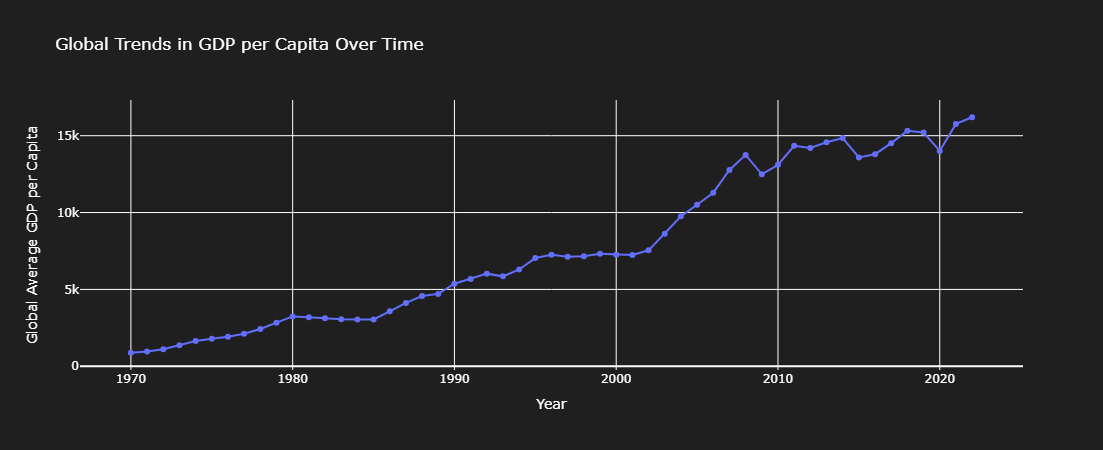

In [6]:
# Calculate the global average GDP per Capita per year
global_trends = df_melted.groupby('Year')['GDP per Capita'].mean().reset_index()

# Create the plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=global_trends['Year'],
    y=global_trends['GDP per Capita'],
    mode='lines+markers',
    name='Global Average'
))
fig.update_layout(
    title='Global Trends in GDP per Capita Over Time',
    xaxis_title='Year',
    yaxis_title='Global Average GDP per Capita',
    plot_bgcolor='#1f1f1f',
    paper_bgcolor='#1f1f1f',
    height = 450 ,
    font=dict(color='white')
)
fig.show()

# COMPARATIVE ANALYSIS BETWEEN TOP PERFORM AND BOTTOM PERFORMER COUNTRIES.

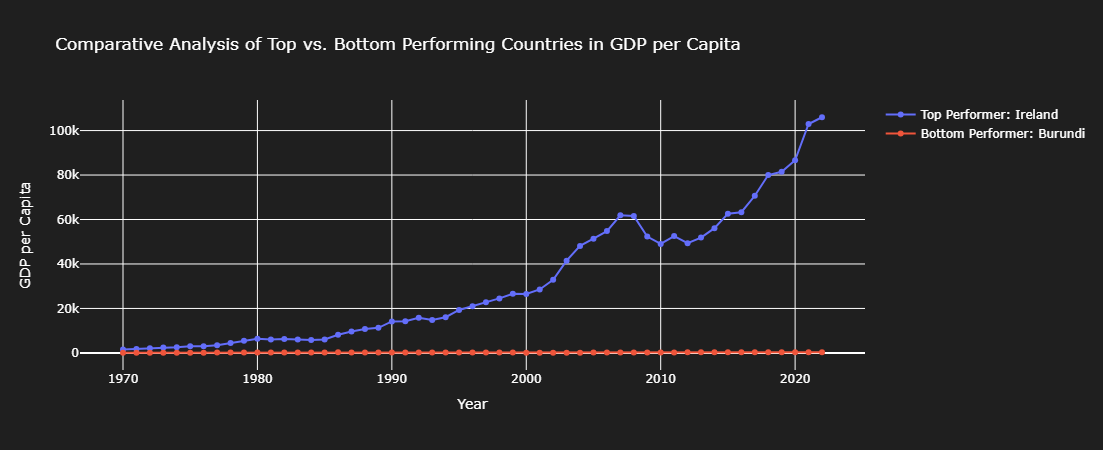

In [7]:
# Get the latest year available
latest_year = df_melted['Year'].max()

# Filter data for the latest year
latest_data = df_melted[df_melted['Year'] == latest_year]

# Identify top and bottom performers
top_performers = latest_data.nlargest(1, 'GDP per Capita')['Country'].values
bottom_performers = latest_data.nsmallest(1, 'GDP per Capita')['Country'].values


# Filter data for the top and bottom performers
top_performance_data = df_melted[df_melted['Country'].isin(top_performers)]
bottom_performance_data = df_melted[df_melted['Country'].isin(bottom_performers)]

# Create the figure
fig = go.Figure()

# Add traces for top performer
for country in top_performers:
    country_data = top_performance_data[top_performance_data['Country'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['GDP per Capita'],
        mode='lines+markers',
        name=f'Top Performer: {country}'
    ))

# Add traces for bottom performer
for country in bottom_performers:
    country_data = bottom_performance_data[bottom_performance_data['Country'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['GDP per Capita'],
        mode='lines+markers',
        name=f'Bottom Performer: {country}'
    ))

# Update layout
fig.update_layout(
    title='Comparative Analysis of Top vs. Bottom Performing Countries in GDP per Capita',
    xaxis_title='Year',
    yaxis_title='GDP per Capita',
    plot_bgcolor='#1f1f1f',
    paper_bgcolor='#1f1f1f',
    height = 450 ,
    font=dict(color='white')
)

# Show the figure
fig.show()

# GROWTH RATE ANALYSIS OF EVERY COUNTRY YEAR BY YEAR :

In [8]:

# Calculate annual growth rate
df_melted.sort_values(['Country', 'Year'], inplace=True)
df_melted['Annual Growth Rate'] = df_melted.groupby('Country')['GDP per Capita'].pct_change() * 100

# Create the interactive chart
def plot_growth_rate(selected_country):
    filtered_df = df_melted[df_melted['Country'] == selected_country]

    # Define colors based on the value of 'Annual Growth Rate'
    colors = ['red' if value < 0 else 'blue' for value in filtered_df['Annual Growth Rate']]
    
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=filtered_df['Year'],
        y=filtered_df['Annual Growth Rate'],
        marker_color=colors,  # Apply colors,
        name=selected_country
    ))
    
    fig.update_layout(
        title=f'Annual Growth Rate of GDP per Capita for {selected_country}',
        xaxis_title='Year',
        yaxis_title='Annual Growth Rate (%)',
        plot_bgcolor='#1f1f1f',  # Light background for plot
        paper_bgcolor='#1f1f1f',  # Light background for paper
        font=dict(color='white'),  # Black font color
        height=450
    )
    
    fig.show()

# Create a dropdown widget
country_dropdown = widgets.Dropdown(
    options=[(country, country) for country in df['Country'].unique()],
    value=df['Country'].unique()[0],  # Default value
    description='Country:',
)

# Create interactive plot
interact(plot_growth_rate, selected_country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=(('Afghanistan', 'Afghanistan'), ('Albania', 'A…

<function __main__.plot_growth_rate(selected_country)>

# Cross-Country Correlation Analysis of Annual GDP per Capita Growth Rates

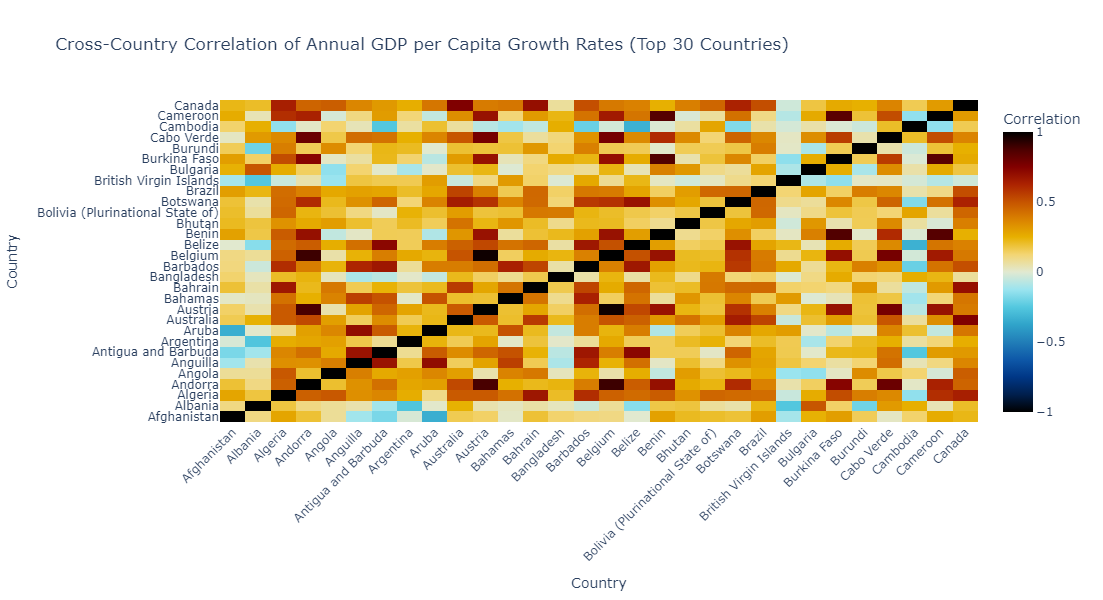

In [9]:
# Pivot the DataFrame to have countries as columns and years as rows
pivot_df = df_melted.pivot_table(index='Year', columns='Country', values='Annual Growth Rate')

# Calculate correlation matrix
correlation_matrix = pivot_df.corr()



# Set the number of countries to display in the heatmap
num_countries = 30  # Adjust this number based on your needs

# Select a subset of countries (or the top `num_countries` based on some criteria)
top_countries = correlation_matrix.columns[:num_countries]
subset_corr_matrix = correlation_matrix.loc[top_countries, top_countries]

# Create an interactive heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=subset_corr_matrix.values,
    x=subset_corr_matrix.columns,
    y=subset_corr_matrix.columns,
    colorscale='icefire',
    colorbar=dict(title='Correlation'),
    zmin=-1,
    zmax=1,
    hoverongaps=False
))

fig.update_layout(
    title=f'Cross-Country Correlation of Annual GDP per Capita Growth Rates (Top {num_countries} Countries)',
    xaxis_title='Country',
    yaxis_title='Country',
    xaxis=dict(
        tickvals=list(range(len(subset_corr_matrix.columns))),
        ticktext=subset_corr_matrix.columns,
        tickangle=-45  # Rotate x-axis labels
    ),
    yaxis=dict(
        tickvals=list(range(len(subset_corr_matrix.columns))),
        ticktext=subset_corr_matrix.columns
    ),
    height=600,  # Increase figure height,
   
)

fig.show()

# Economic Growth Classification: 
## Classify countries based on their GDP per capita growth into categories such as high-growth, stable, and low-growth.

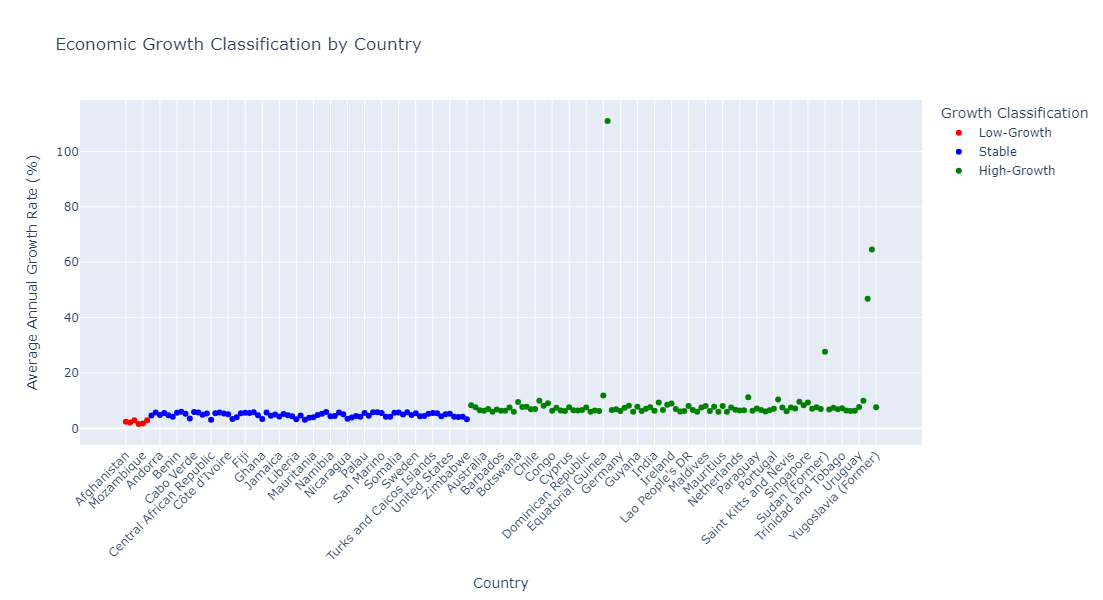

In [10]:
# Calculate average annual growth rate for each country
average_growth_rate = df_melted.groupby('Country')['Annual Growth Rate'].mean().reset_index()
average_growth_rate.columns = ['Country', 'Average Annual Growth Rate']


# Define thresholds for classification
def classify_growth(rate):
    if rate >= 6:
        return 'High-Growth'
    elif rate >= 3:
        return 'Stable'
    else:
        return 'Low-Growth'

# Apply classification
average_growth_rate['Growth Classification'] = average_growth_rate['Average Annual Growth Rate'].apply(classify_growth)



# Create a scatter plot to visualize growth classifications
fig = px.scatter(
    average_growth_rate,
    x='Country',
    y='Average Annual Growth Rate',
    color='Growth Classification',
    title='Economic Growth Classification by Country',
    labels={'Average Annual Growth Rate': 'Average Annual Growth Rate (%)'},
    color_discrete_map={'High-Growth': 'green', 'Stable': 'blue', 'Low-Growth': 'red'}
)

# Customize layout
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average Annual Growth Rate (%)',
    xaxis_tickangle=-45,  # Rotate x-axis labels for readability
    height=600,  # Adjust height for better visibility
    
)

fig.show()

# WORLD MAP TO REPRESENT THE SAME ANALYSIS AS SHOWN ABOVE IN THE GRAPH...

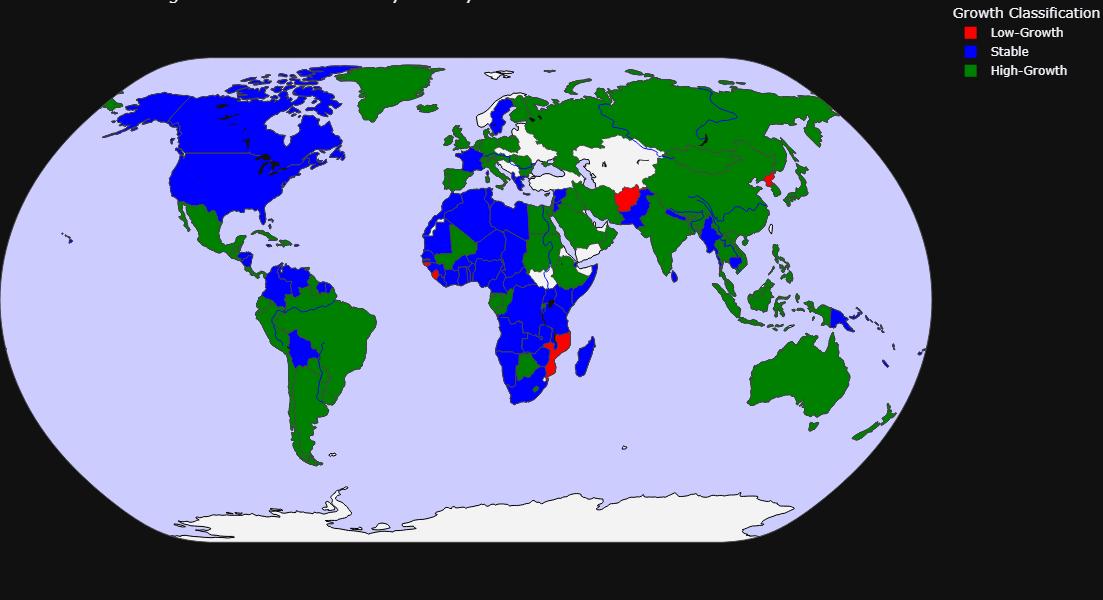

In [11]:

# Create the interactive choropleth map
fig = px.choropleth(
    average_growth_rate,
    locations='Country',
    locationmode='country names',
    color='Growth Classification',
    color_discrete_map={
        'High-Growth': 'green',
        'Stable': 'blue',
        'Low-Growth': 'red'
    },
    title='Annual Average Growth Classification by Country',
    labels={'Growth Classification': 'Growth Classification'},
    template='plotly_dark'
)

fig.update_geos(
    projection_type='natural earth',  # Choose a projection type
    showcoastlines=True,
    coastlinecolor='Black',
    showland=True,
    landcolor='rgb(243, 243, 243)',
    showocean=True,
    oceancolor='rgb(204, 204, 255)',
    showrivers=True,
    rivercolor='rgb(0, 0, 255)'
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title='Growth Classification',
        tickvals=['High-Growth', 'Stable', 'Low-Growth'],
        ticktext=['High-Growth', 'Stable', 'Low-Growth']
    ),
    height=600,  # Adjust the height for better visibility
    margin={"r":0,"t":0,"l":0,"b":0}  # Remove margins if needed
)

fig.show()

# THANK YOU ......... *I HOPE YOU LIKED IT*